# IN3061/INM430 - Tiny DS Project Progress Report


***

** Student Name: ** Anvesha Mishra

** Project Title:** Suicide in India 2019:
A Case Study on the impact of the societal constructs on Mental Health

***




In [1]:
# Write your code here
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import scipy.stats as stats
import math
from matplotlib.pyplot import figure



In [2]:
#Load the csv files and merge them into a single dataframe

suicidedf = pd.concat(
	map(pd.read_csv, ['SuicideMale.csv', 'SuicideFemale.csv','SuicideTrans.csv']), ignore_index=True)
suicidedf

,Category,State/UT,Type Code,Type,Gender,Total
0,State,ANDHRA PRADESH,Means_Adopted,By Consuming Sleeping Pills,Male,19
1,State,ARUNACHAL PRADESH,Means_Adopted,By Consuming Sleeping Pills,Male,0
2,State,ASSAM,Means_Adopted,By Consuming Sleeping Pills,Male,6
3,State,BIHAR,Means_Adopted,By Consuming Sleeping Pills,Male,30
4,State,CHHATTISGARH,Means_Adopted,By Consuming Sleeping Pills,Male,7
...,...,...,...,...,...,...
9715,UT,D & N HAVELI,Reason,Other Causes,Trans,0
9716,UT,DAMAN & DIU,Reason,Other Causes,Trans,0
9717,UT,DELHI (UT),Reason,Other Causes,Trans,0
9718,UT,LAKSHADWEEP,Reason,Other Causes,Trans,0


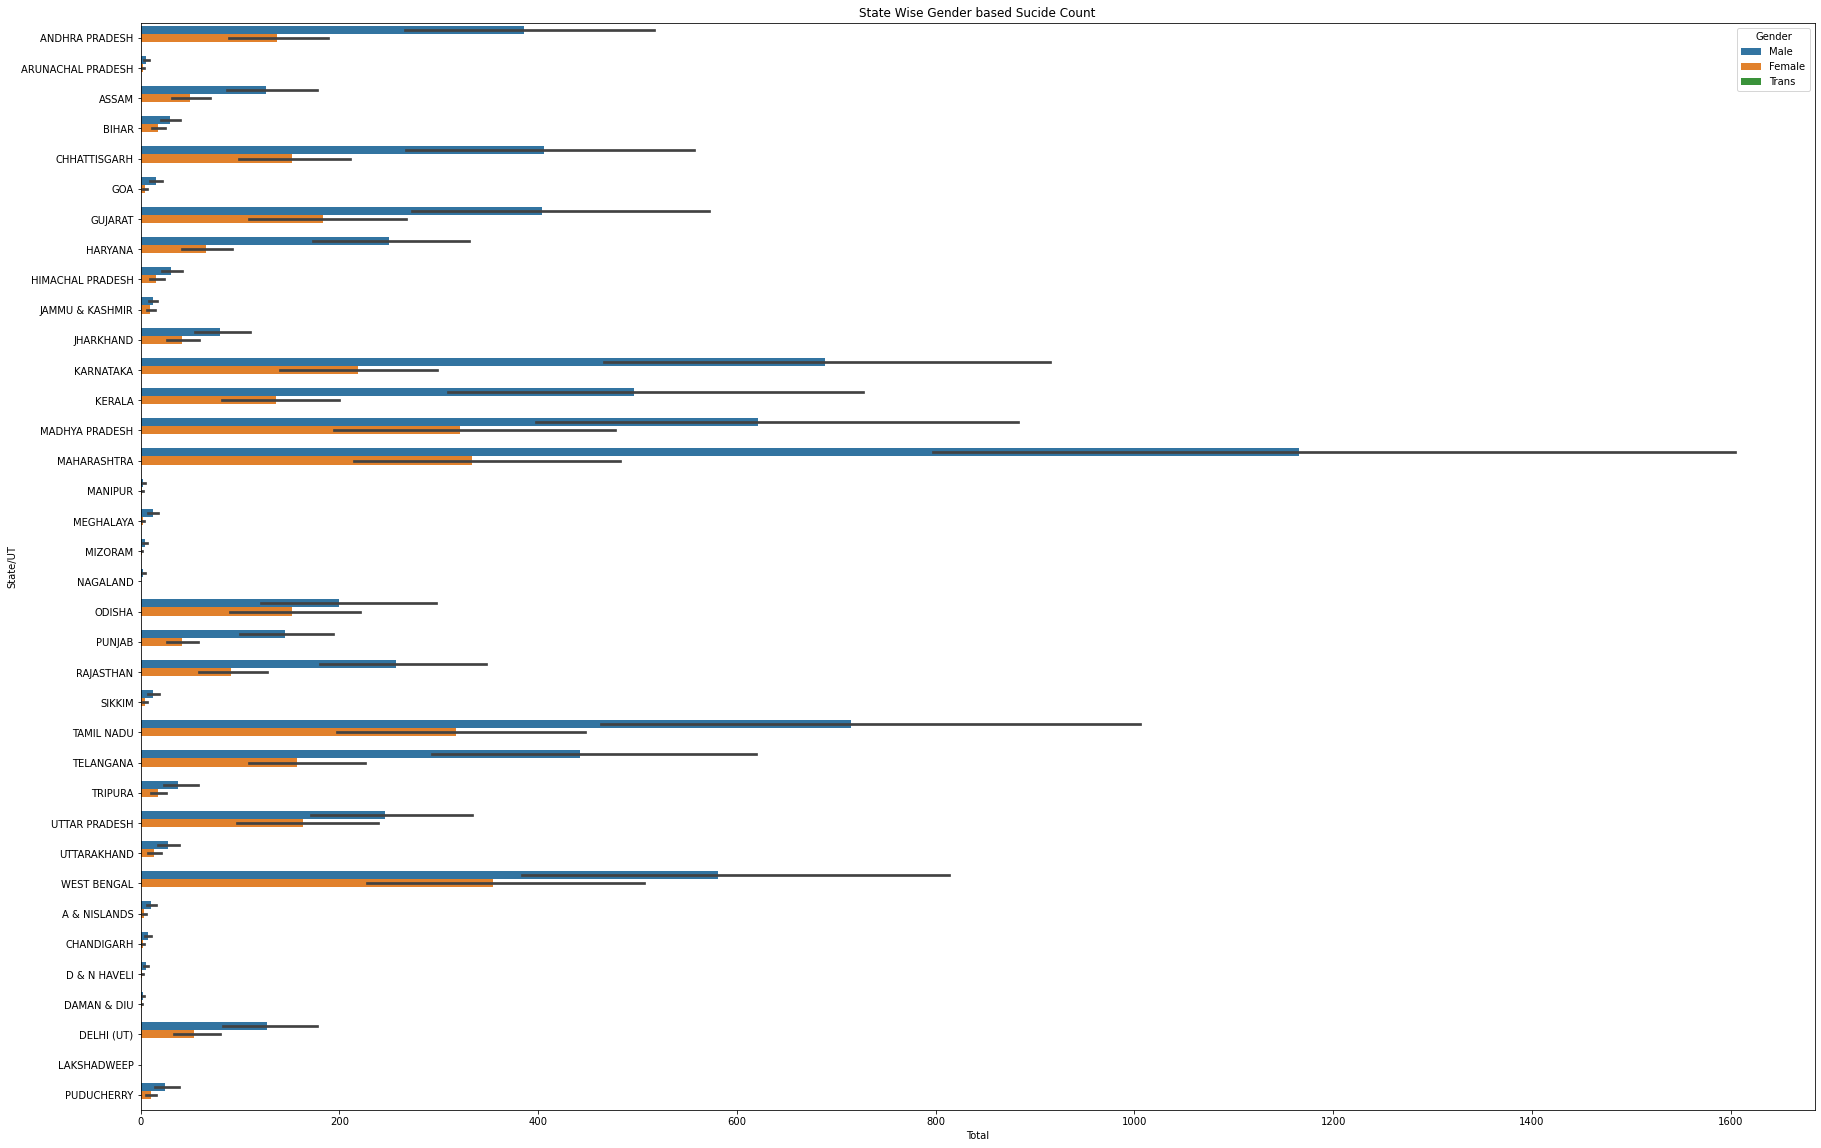

In [3]:
plt.figure(figsize= (30,20)) # Make a plot size
plt.title('State Wise Gender based Sucide Count')
ax = sns.barplot(x ='Total' , y ='State/UT', hue = 'Gender', data = suicidedf)
plt.show()


In [4]:
total_suicides=suicidedf["Total"].sum()
total_male=suicidedf["Total"][suicidedf.Gender=="Male"].sum()

total_female=suicidedf["Total"][suicidedf.Gender=="Female"].sum()

total_trans=suicidedf["Total"][suicidedf.Gender=="Trans"].sum()

print("Total Suicide cases in India in 2019 :", total_suicides)
print("Total number of males committing suicides in 2019 :", total_male,
      "\t Percent share of male cases",(total_male*100)/total_suicides)
print("Total number of females committing suicides in 2019 :", total_female,
     "\t Percent share of female cases",(total_female*100)/total_suicides)
print("Total number of trans committing suicides in 2019 :", total_trans,
      "\t Percent share of trans cases",(total_trans*100)/total_suicides)

Total Suicide cases in India in 2019 : 959876
Total number of males committing suicides in 2019 : 682369 	 Percent share of male cases 71.08928653284383
Total number of females committing suicides in 2019 : 277391 	 Percent share of female cases 28.898628572857326
Total number of trans committing suicides in 2019 : 116 	 Percent share of trans cases 0.012084894298846934


In [5]:
suicidedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   9720 non-null   object
 1   State/UT   9720 non-null   object
 2   Type Code  9720 non-null   object
 3   Type       9720 non-null   object
 4   Gender     9720 non-null   object
 5   Total      9720 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 455.8+ KB


In [6]:
suicidedf.isnull().sum()

Category     0
State/UT     0
Type Code    0
Type         0
Gender       0
Total        0
dtype: int64

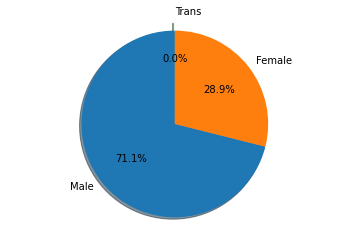

In [7]:

labels = 'Male', 'Female', 'Trans'
sizes = [71.089, 28.899, 0.012]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
#Basic Analysis
statesuicide=suicidedf.groupby("State/UT").sum()
statesuicide=statesuicide.reset_index()
print("Highest Number of suicides are in :\n",statesuicide["State/UT"][statesuicide["Total"]==statesuicide.Total.max()])


Highest Number of suicides are in :
 20    MAHARASHTRA
Name: State/UT, dtype: object


State with highest number of Male suicides : 1490    MAHARASHTRA
Name: State/UT, dtype: object
State with highest number of Female suicides : 1720    WEST BENGAL
Name: State/UT, dtype: object
State with highest number of Trans suicides : 1715    TAMIL NADU
Name: State/UT, dtype: object


<AxesSubplot:title={'center':'Statewise-Trans-Suicides'}, xlabel='Total', ylabel='State/UT'>

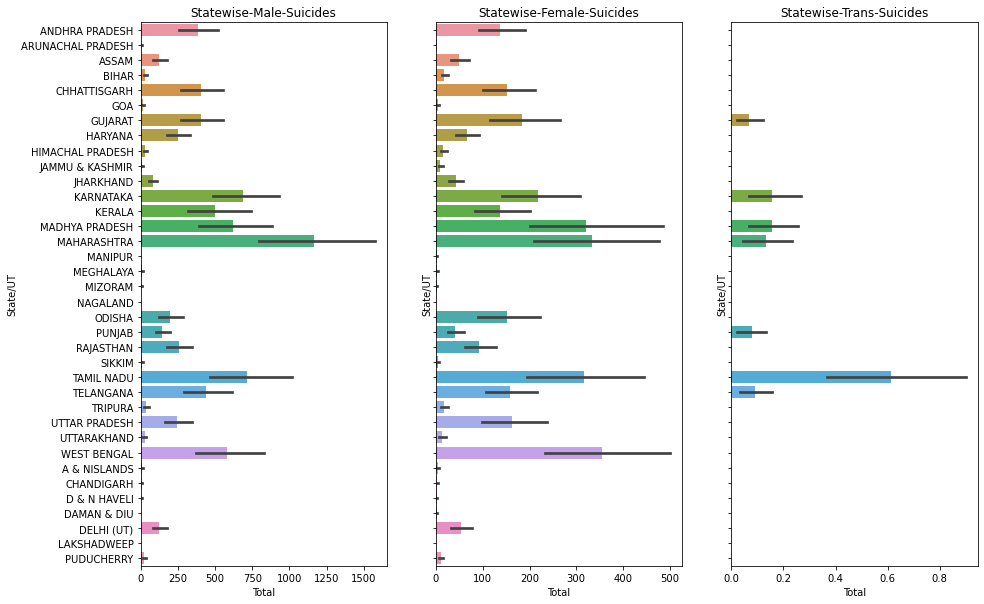

In [9]:
#Loading csv Gender based
suicidemale=pd.read_csv("SuicideMale.csv")
suicidefemale=pd.read_csv("SuicideFemale.csv")
suicidetrans=pd.read_csv("SuicideTrans.csv")
print("State with highest number of Male suicides :",suicidemale["State/UT"][suicidemale["Total"]==suicidemale.Total.max()])
print("State with highest number of Female suicides :",suicidefemale["State/UT"][suicidefemale["Total"]==suicidefemale.Total.max()])
print("State with highest number of Trans suicides :",suicidetrans["State/UT"][suicidetrans["Total"]==suicidetrans.Total.max()])

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,10))
axes[0].set_title('Statewise-Male-Suicides')
sns.barplot(ax=axes[0], x=suicidemale.Total, y=suicidemale["State/UT"])
axes[1].set_title('Statewise-Female-Suicides')
sns.barplot(ax=axes[1], x=suicidefemale.Total, y=suicidefemale["State/UT"])
axes[2].set_title('Statewise-Trans-Suicides')
sns.barplot(ax=axes[2], x=suicidetrans.Total, y=suicidetrans["State/UT"])

In [10]:
#Separating the data into different dataframes

edustatus_df = suicidedf[suicidedf['Type Code']=='Educational Status']
ecostatus_df=suicidedf[suicidedf['Type Code']=='Economic Status']
causes_df = suicidedf[suicidedf['Type Code']=='Reason']
means_df = suicidedf[suicidedf['Type Code']=='Means_Adopted']
profstatus_df = suicidedf[suicidedf['Type Code']=='Profession']
maritalstatus_df = suicidedf[suicidedf['Type Code']=='Marital Status']


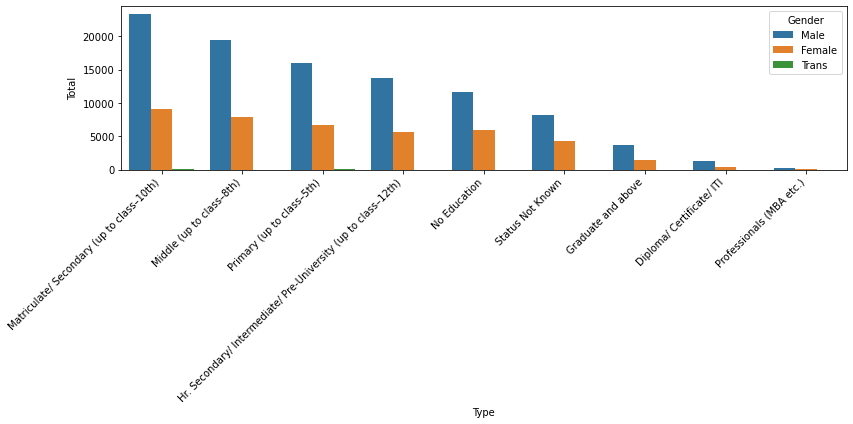

In [11]:
#Analysing the effect of Education on the number of suicides by plotting a bar graph.
plt.figure(figsize=(12,6))
edustatus_df = edustatus_df[['State/UT','Type','Gender','Total']]
edSort = edustatus_df.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x="Type", y="Total", hue="Gender",
            data=edSort)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [12]:
#Replacing categorical education type with ordinal levels to measure if higher education relates to lower suicide
edustatus_df=edustatus_df.replace({'Type':'No Education'},1)
edustatus_df=edustatus_df.replace({'Type':'Primary (up to class–5th)'},2)
edustatus_df=edustatus_df.replace({'Type':'Middle (up to class–8th)'},3)
edustatus_df=edustatus_df.replace({'Type':'Matriculate/ Secondary (up to class–10th)'},4)
edustatus_df=edustatus_df.replace({'Type':'Hr. Secondary/ Intermediate/ Pre-University (up to class–12th)'},5)
edustatus_df=edustatus_df.replace({'Type':'Diploma/ Certificate/ ITI'},6)
edustatus_df=edustatus_df.replace({'Type':'Graduate and above'},7)
edustatus_df=edustatus_df.replace({'Type':'Professionals (MBA etc.)'},8)
edustatus_df=edustatus_df.replace({'Type':'Status Not Known'},0)
edustatus_df=edustatus_df.fillna(0)
edumale=edustatus_df.loc[edustatus_df['Gender'] == 'Male']
edufemale=edustatus_df.loc[edustatus_df['Gender'] == 'Female']
edutrans=edustatus_df.loc[edustatus_df['Gender'] == 'Trans']

In [13]:
#Calculating correlation between education levels and suicide counts 
edu_level=edustatus_df['Type']
edu_suicidetotal=edustatus_df['Total']
print('Pearsons Correlation :')
corrPearson,pValPearson = stats.pearsonr(edu_level,edu_suicidetotal)
print(corrPearson,pValPearson)
print('Spearman Correlation :')
corrSpearman,pValSpearman = stats.spearmanr(edu_level,edu_suicidetotal)
print(corrSpearman,pValSpearman)
edu_level_m=edumale['Type']
edu_suicidetotal_m=edumale['Total']
print('Pearsons Correlation for Males:')
corrPearson,pValPearson = stats.pearsonr(edu_level_m,edu_suicidetotal_m)
print(corrPearson,pValPearson)
print('Spearman Correlation for Males:')
corrSpearman,pValSpearman = stats.spearmanr(edu_level_m,edu_suicidetotal_m)
print(corrSpearman,pValSpearman)
edu_level_f=edufemale['Type']
edu_suicidetotal_f=edufemale['Total']
print('Pearsons Correlation for females:')
corrPearson,pValPearson = stats.pearsonr(edu_level_f,edu_suicidetotal_f)
print(corrPearson,pValPearson)
print('Spearman Correlation for females:')
corrSpearman,pValSpearman = stats.spearmanr(edu_level_f,edu_suicidetotal_f)
print(corrSpearman,pValSpearman)
edu_level_t=edutrans['Type']
edu_suicidetotal_t=edutrans['Total']
print('Pearsons Correlation for trans:')
corrPearson,pValPearson = stats.pearsonr(edu_level_t,edu_suicidetotal_t)
print(corrPearson,pValPearson)
print('Spearman Correlation for trans:')
corrSpearman,pValSpearman = stats.spearmanr(edu_level_t,edu_suicidetotal_t)
print(corrSpearman,pValSpearman)

Pearsons Correlation :
-0.1393873646592787 1.2924268116581071e-05
Spearman Correlation :
-0.1693773918644705 1.082518070798076e-07
Pearsons Correlation for Males:
-0.18430893565893977 0.0008580997054241902
Spearman Correlation for Males:
-0.2778461512059857 3.7285445212059463e-07
Pearsons Correlation for females:
-0.21719278505062142 8.096964792303153e-05
Spearman Correlation for females:
-0.28920097203043427 1.1633632029035641e-07
Pearsons Correlation for trans:
-0.05275957804660769 0.34381129257756216
Spearman Correlation for trans:
-0.06314915274687698 0.25703659067108675


It is observed that for females there is a slightly better negative correlation between the two variables.This could mean a higher education results in lesser female suicide counts.

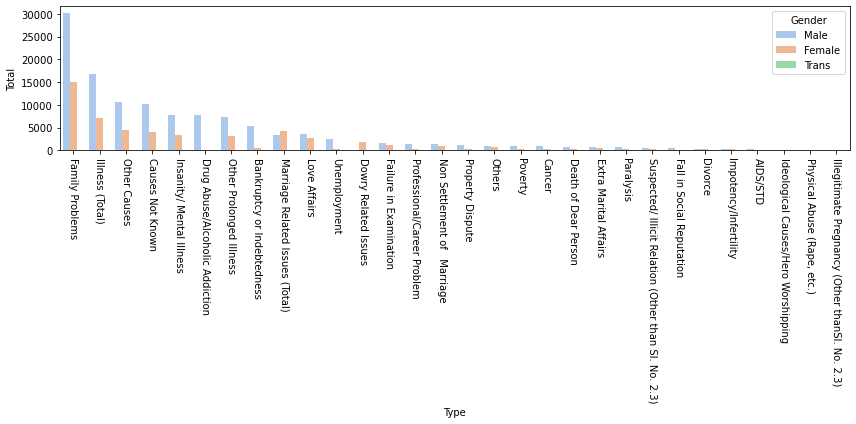

In [14]:
plt.figure(figsize=(12,6))
causes_df = causes_df[['State/UT','Type','Gender','Total']]
causesSort = causes_df.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=causesSort,palette='pastel')
plt.xticks(rotation=270)
plt.tight_layout()

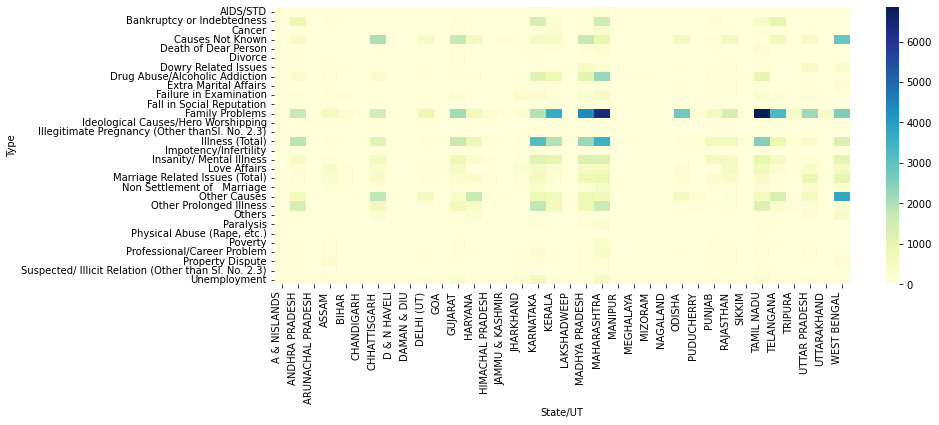

In [15]:
#Heatmap to visualise the causes as per the States in India
causesGrp = causes_df.groupby(['State/UT','Type'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Type',columns='State/UT',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='YlGnBu')
plt.tight_layout()

The states of Maharashtra,Madhya Pradesh, Kerela, Telangana and Tamil Nadu had the most amount of people committing suicides due to Family Problems. 

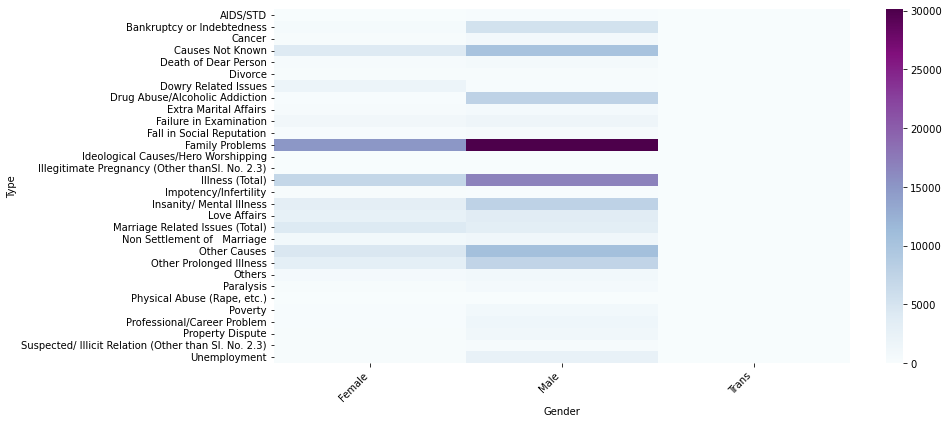

In [16]:
#Heatmap to visualise the causes as per Gender in India
causesGrp = causes_df.groupby(['Type','Gender'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Type',columns='Gender',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='BuPu')
plt.tight_layout()

1.The topmost cause is family problems. 

2.People committing suicides due to illness, prolonged illness , and mental illness indicates that the patients need better mental support as part of their treatment.

3.Marriage related issues and love affairs are one of most common reasons for committing suicides.

4.Gender specific inferences :
- Men have a higher tendency of committing suicide due to drug abuse and alcohol addiction in India.
- Men also have a higher number of suicide counts due to Bankrupty/Indebtedness.
- A large number of women and men in india commit suicide due to marriage related issues.

These inferences raise questions like -men are the sole breadwinner in most indian households; is the burden of earning for a family affecting the mental health of men in India or how marriage related issues affect the mental health of the people in India.

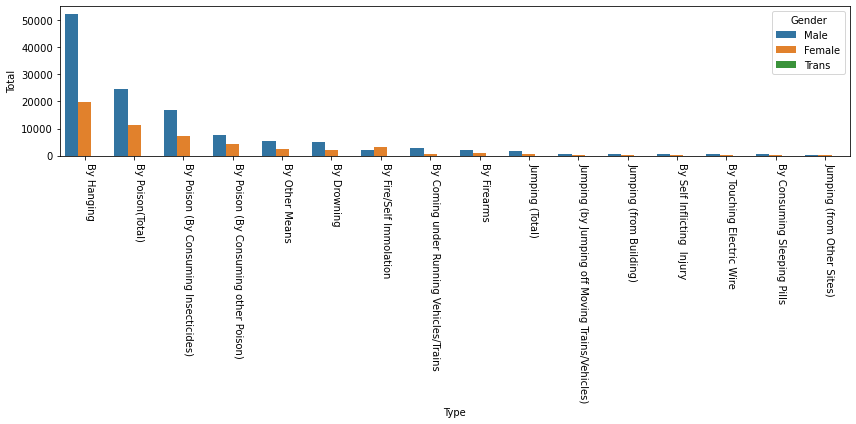

In [17]:
plt.figure(figsize=(12,6))
means_df = means_df[['State/UT','Type','Gender','Total']]
meansSort = means_df.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x="Type", y="Total", hue="Gender",
            data=meansSort)
plt.xticks(rotation=270,ha="left")
plt.tight_layout()

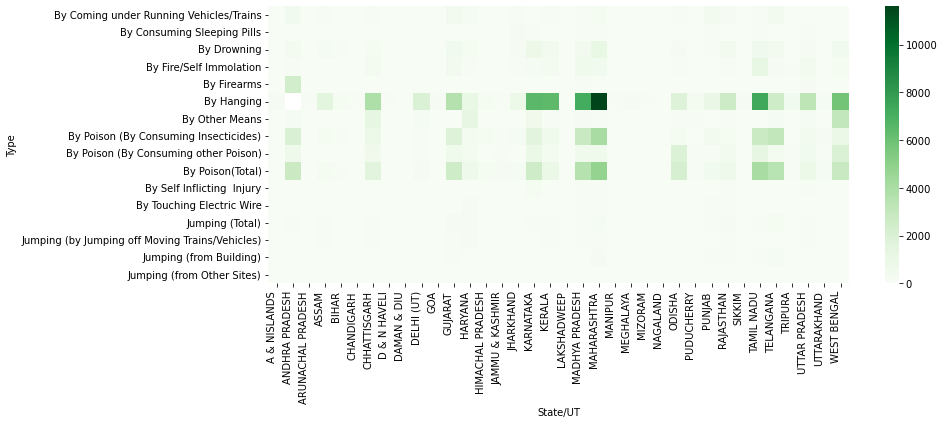

In [18]:
#Heatmap to visualise the means as per the States in India
meansGrp = means_df.groupby(['State/UT','Type'],as_index=False).sum()
meansGrpPvt = meansGrp.pivot(index='Type',columns='State/UT',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(meansGrpPvt,cmap='Greens')
plt.tight_layout()

/var/folders/rv/97pbr0fj3yz5y_0_4r87mlj40000gn/T/ipykernel_82584/3618515158.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


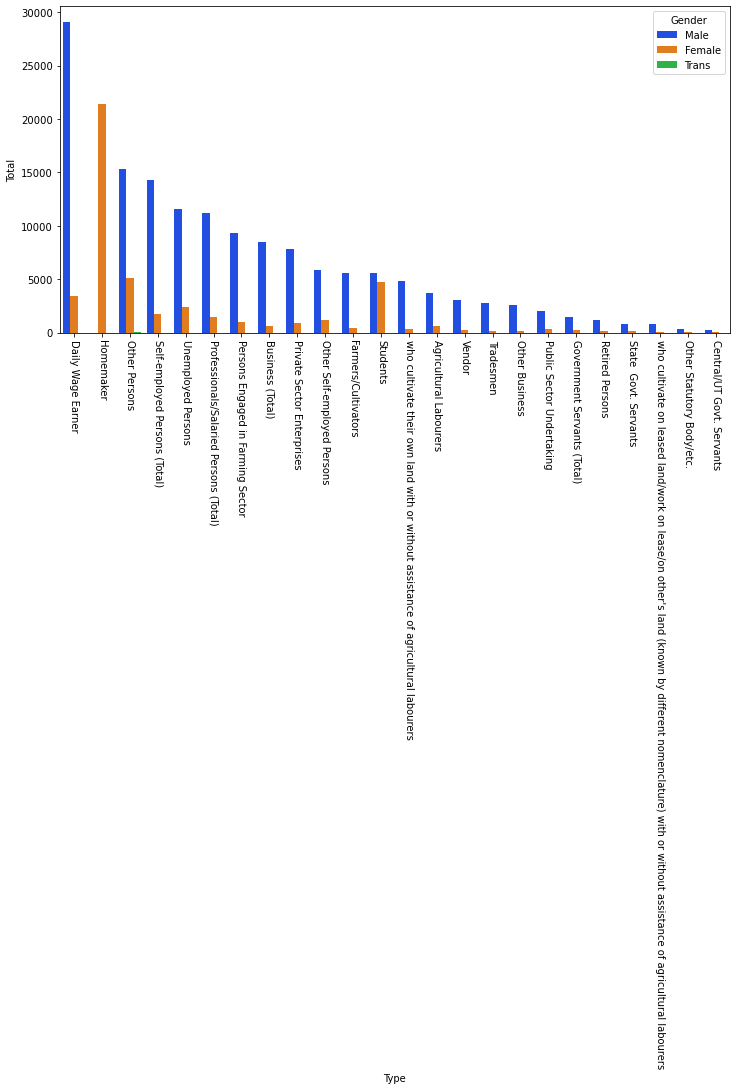

In [19]:
#Plot for Professional Status of the people who committed suicide
plt.figure(figsize=(12,6))
profstatus_df = profstatus_df[['State/UT','Type','Gender','Total']]
profstatusSort = profstatus_df.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=profstatusSort,palette='bright')
plt.xticks(rotation=270)
plt.tight_layout()

The visualisation indicates that men who are daily wage earner committed the most amount of suicides.

About 80% of the women suicide counts were homemakers by profession.

Students(both males and females) commit suicides.This points to the pressures of the education system in India.

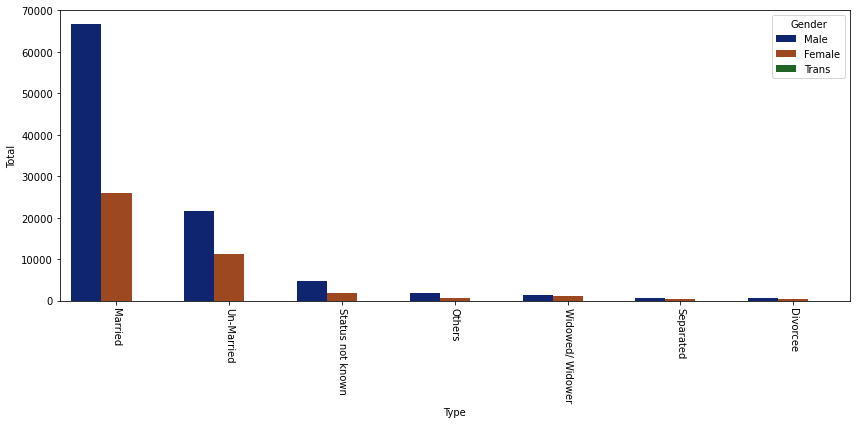

In [20]:
#Plot to show the marital status of the people who have committed suicides
plt.figure(figsize=(12,6))
maritalstatus_df = maritalstatus_df[['State/UT','Type','Gender','Total']]
maritalstatusSort = maritalstatus_df.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=maritalstatusSort,palette='dark')
plt.xticks(rotation=270)
plt.tight_layout()

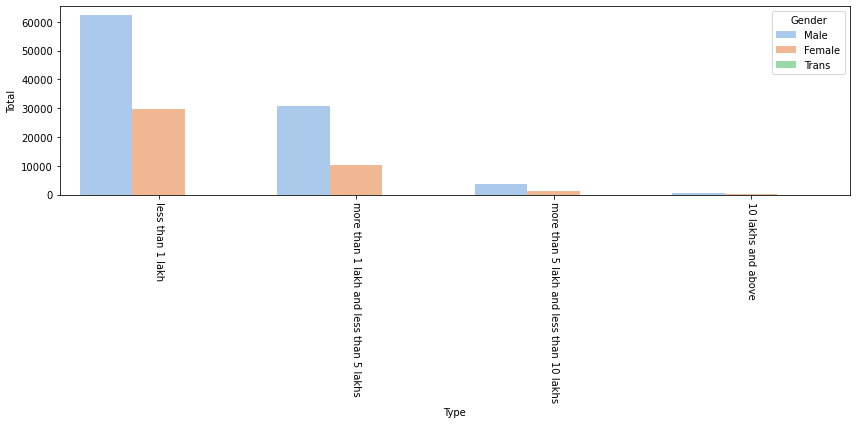

In [21]:
#Plot for economic status and suicide counts 
plt.figure(figsize=(12,6))
ecostatus_df = ecostatus_df[['State/UT','Type','Gender','Total']]
ecostatusSort = ecostatus_df.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=ecostatusSort,palette='pastel')
plt.xticks(rotation=270)
plt.tight_layout()

Its clear that lower income levels, result in poor mental health of the people.

In [22]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between IncomeLevel and SuicideCounts
# Assumption(H0) is that IncomeLevel and SuicideCounts are NOT correlated
 
# Finds out the SuicideCounts for each IncomeLevel as a list
CategoryGroupLists=ecostatus_df.groupby('Type')['Total'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  1.5554876557528862e-12


As the p-value is very small, the null hypothesis is rejected. The two variables are correlated.We can also visualise that lower income level has higher suicide counts.

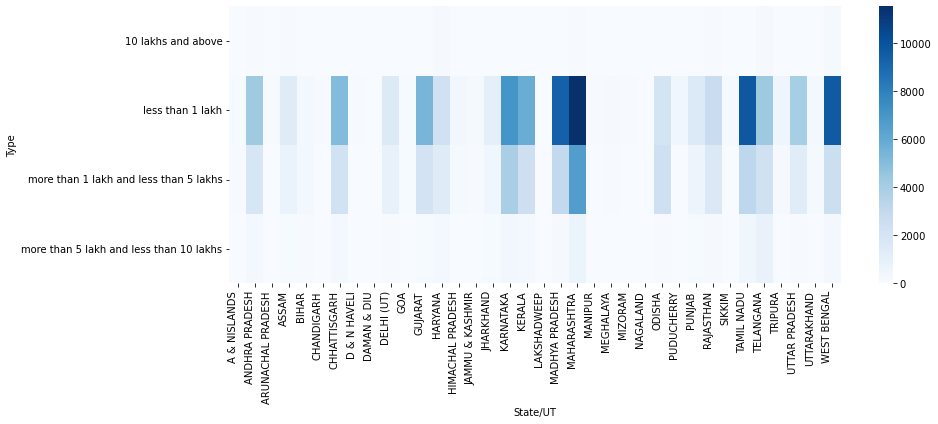

In [23]:
#Heatmap to visualise the economic status as per the States in India
ecoGrp = ecostatus_df.groupby(['State/UT','Type'],as_index=False).sum()
ecoGrpPvt = ecoGrp.pivot(index='Type',columns='State/UT',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(ecoGrpPvt,cmap='Blues')
plt.tight_layout()

Text(0, 0.5, 'Count')

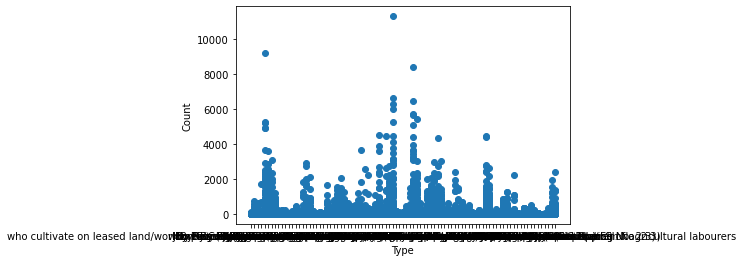

In [24]:
#Visualising the distribution of the data
plt.scatter(suicidedf.Type,suicidedf.Total)
plt.xlabel('Type')
plt.ylabel('Count')

The dataset essentially follows a Gaussian Distribution. A Linear Regression model can be applied to it.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


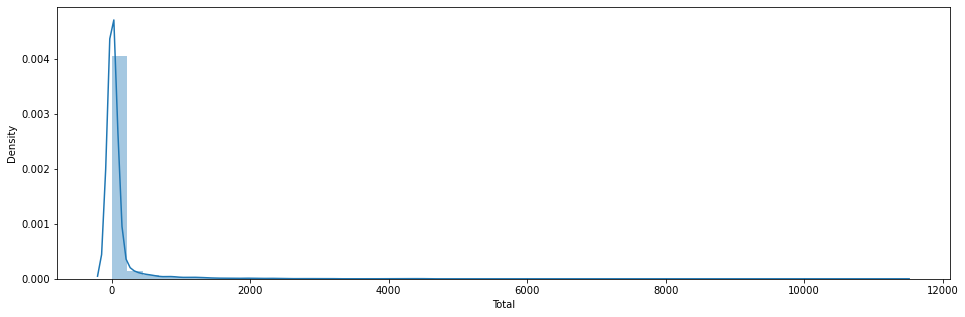

In [25]:
#Plotting the distribution for the numerical variable
plt.figure(figsize=(16,5))
sns.distplot(suicidedf["Total"])
plt.show()

# Outlier removal

In [26]:
print("Highest allowed",suicidedf["Total"].mean() + 3*suicidedf["Total"].std())
print("Lowest allowed",suicidedf["Total"].mean() - 3*suicidedf["Total"].std())


Highest allowed 1385.0835252529594
Lowest allowed -1187.5781754587208


In [27]:
new_df =suicidedf[(suicidedf["Total"] > (suicidedf["Total"].mean() + 3*suicidedf["Total"].std())) | (suicidedf["Total"] < (suicidedf["Total"].mean() - 3*suicidedf["Total"].std()))]

upper_limit = suicidedf["Total"].mean() + 3*suicidedf["Total"].std()
lower_limit = suicidedf["Total"].mean() - 3*suicidedf["Total"].std()

suicidedf["Total"] = np.where(
    suicidedf["Total"]>upper_limit,
    upper_limit,
    np.where(
       suicidedf["Total"]<lower_limit,
        lower_limit,
        suicidedf["Total"]
    )
)

In [28]:
suicidedf["Total"].describe()


count    9720.000000
mean       76.551589
std       239.762332
min         0.000000
25%         0.000000
50%         0.000000
75%        19.000000
max      1385.083525
Name: Total, dtype: float64

# Feature Scaling

In [29]:
#Scaling the Suicide Count Values
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
suicidedf[['Total']] = mms.fit_transform(suicidedf[['Total']])
suicidedf

,Category,State/UT,Type Code,Type,Gender,Total
0,State,ANDHRA PRADESH,Means_Adopted,By Consuming Sleeping Pills,Male,0.013718
1,State,ARUNACHAL PRADESH,Means_Adopted,By Consuming Sleeping Pills,Male,0.000000
2,State,ASSAM,Means_Adopted,By Consuming Sleeping Pills,Male,0.004332
3,State,BIHAR,Means_Adopted,By Consuming Sleeping Pills,Male,0.021659
4,State,CHHATTISGARH,Means_Adopted,By Consuming Sleeping Pills,Male,0.005054
...,...,...,...,...,...,...
9715,UT,D & N HAVELI,Reason,Other Causes,Trans,0.000000
9716,UT,DAMAN & DIU,Reason,Other Causes,Trans,0.000000
9717,UT,DELHI (UT),Reason,Other Causes,Trans,0.000000
9718,UT,LAKSHADWEEP,Reason,Other Causes,Trans,0.000000


# Feature Extraction and Preprocessing

In [30]:
#Encoding Male as 0 and Female as 1 and dropping the Trans gender as the data is too less for analysis.
suicidedf=suicidedf.replace({'Gender':'Male'},0)
suicidedf=suicidedf.replace({'Gender':'Female'},1)
suicidedf=suicidedf.drop(suicidedf.index[suicidedf["Gender"]=="Trans"])
suicidedf

,Category,State/UT,Type Code,Type,Gender,Total
0,State,ANDHRA PRADESH,Means_Adopted,By Consuming Sleeping Pills,0,0.013718
1,State,ARUNACHAL PRADESH,Means_Adopted,By Consuming Sleeping Pills,0,0.000000
2,State,ASSAM,Means_Adopted,By Consuming Sleeping Pills,0,0.004332
3,State,BIHAR,Means_Adopted,By Consuming Sleeping Pills,0,0.021659
4,State,CHHATTISGARH,Means_Adopted,By Consuming Sleeping Pills,0,0.005054
...,...,...,...,...,...,...
6475,UT,D & N HAVELI,Reason,Other Causes,1,0.000000
6476,UT,DAMAN & DIU,Reason,Other Causes,1,0.000000
6477,UT,DELHI (UT),Reason,Other Causes,1,0.118404
6478,UT,LAKSHADWEEP,Reason,Other Causes,1,0.000000


In [31]:
#Dummy encoding for "State/UT"
dum_states = pd.get_dummies(suicidedf["State/UT"], prefix='State/UT')
dum_states

,State/UT_A & NISLANDS,State/UT_ANDHRA PRADESH,State/UT_ARUNACHAL PRADESH,State/UT_ASSAM,State/UT_BIHAR,State/UT_CHANDIGARH,State/UT_CHHATTISGARH,State/UT_D & N HAVELI,State/UT_DAMAN & DIU,State/UT_DELHI (UT),...,State/UT_PUDUCHERRY,State/UT_PUNJAB,State/UT_RAJASTHAN,State/UT_SIKKIM,State/UT_TAMIL NADU,State/UT_TELANGANA,State/UT_TRIPURA,State/UT_UTTAR PRADESH,State/UT_UTTARAKHAND,State/UT_WEST BENGAL
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6476,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6477,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Dummy encoding for "Type" and "Type Code"
dum_typecode = pd.get_dummies(suicidedf["Type Code"], prefix='Type Code')
dum_type = pd.get_dummies(suicidedf["Type"], prefix='Type')
dum_type

,Type_10 lakhs and above,Type_AIDS/STD,Type_Agricultural Labourers,Type_Bankruptcy or Indebtedness,Type_Business (Total),Type_By Coming under Running Vehicles/Trains,Type_By Consuming Sleeping Pills,Type_By Drowning,Type_By Fire/Self Immolation,Type_By Firearms,...,Type_Un-Married,Type_Unemployed Persons,Type_Unemployment,Type_Vendor,Type_Widowed/ Widower,Type_less than 1 lakh,Type_more than 1 lakh and less than 5 lakhs,Type_more than 5 lakh and less than 10 lakhs,Type_who cultivate on leased land/work on lease/on other's land (known by different nomenclature) with or without assistance of agricultural labourers,Type_who cultivate their own land with or without assistance of agricultural labourers
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Merging the encoded dataframes into the original suicide dataframe
suicidedf = pd.concat([suicidedf,dum_states,dum_typecode,dum_type],axis=1)
suicidedf

,Category,State/UT,Type Code,Type,Gender,Total,State/UT_A & NISLANDS,State/UT_ANDHRA PRADESH,State/UT_ARUNACHAL PRADESH,State/UT_ASSAM,...,Type_Un-Married,Type_Unemployed Persons,Type_Unemployment,Type_Vendor,Type_Widowed/ Widower,Type_less than 1 lakh,Type_more than 1 lakh and less than 5 lakhs,Type_more than 5 lakh and less than 10 lakhs,Type_who cultivate on leased land/work on lease/on other's land (known by different nomenclature) with or without assistance of agricultural labourers,Type_who cultivate their own land with or without assistance of agricultural labourers
0,State,ANDHRA PRADESH,Means_Adopted,By Consuming Sleeping Pills,0,0.013718,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,State,ARUNACHAL PRADESH,Means_Adopted,By Consuming Sleeping Pills,0,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,State,ASSAM,Means_Adopted,By Consuming Sleeping Pills,0,0.004332,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,State,BIHAR,Means_Adopted,By Consuming Sleeping Pills,0,0.021659,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,State,CHHATTISGARH,Means_Adopted,By Consuming Sleeping Pills,0,0.005054,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,UT,D & N HAVELI,Reason,Other Causes,1,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6476,UT,DAMAN & DIU,Reason,Other Causes,1,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6477,UT,DELHI (UT),Reason,Other Causes,1,0.118404,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6478,UT,LAKSHADWEEP,Reason,Other Causes,1,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Separating the data into Feature variable and Target variable.
x=suicidedf.drop(["Total","Category","State/UT","Type Code","Type"],axis=1)
y=suicidedf.Total
x

,Gender,State/UT_A & NISLANDS,State/UT_ANDHRA PRADESH,State/UT_ARUNACHAL PRADESH,State/UT_ASSAM,State/UT_BIHAR,State/UT_CHANDIGARH,State/UT_CHHATTISGARH,State/UT_D & N HAVELI,State/UT_DAMAN & DIU,...,Type_Un-Married,Type_Unemployed Persons,Type_Unemployment,Type_Vendor,Type_Widowed/ Widower,Type_less than 1 lakh,Type_more than 1 lakh and less than 5 lakhs,Type_more than 5 lakh and less than 10 lakhs,Type_who cultivate on leased land/work on lease/on other's land (known by different nomenclature) with or without assistance of agricultural labourers,Type_who cultivate their own land with or without assistance of agricultural labourers
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6476,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6477,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6478,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

In [35]:
#Separating the data into Feature variable and Target variable to apply Multiple Linear Regression Model
u=suicidedf.drop(["Total","Category","State/UT","Type Code","Type"],axis=1)
v=suicidedf.Total
from sklearn.model_selection import train_test_split
u_train,u_test,v_train,v_test=train_test_split(u,v,test_size=0.2)

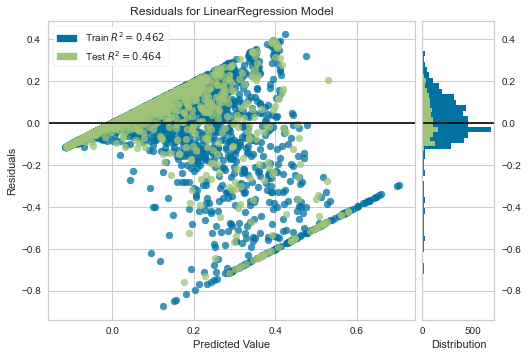

array([-0.02912903,  0.12046814,  0.18991089, ...,  0.52636719,
       -0.04408264,  0.12124634])

In [36]:
# importing module
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data


visualizer = ResidualsPlot(LR)

visualizer.fit(u_train, v_train)  # Fit the training data to the visualizer
visualizer.score(u_test, v_test)  # Evaluate the model on the test data
visualizer.show()  
LR.fit(u_train,v_train)
v_pred =  LR.predict(u_test)
v_pred

In [37]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(v_test,v_pred)
print("R2 Score:",score)
print("MSE :",mean_squared_error(v_test,v_pred))
print("RMSE:",np.sqrt(mean_squared_error(v_test,v_pred)))
print("Accuracy:",LR.score(u_test,v_test))

R2 Score: 0.46400132343385847
MSE : 0.022988457101068033
RMSE: 0.1516194482943004
Accuracy: 0.46400132343385847


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


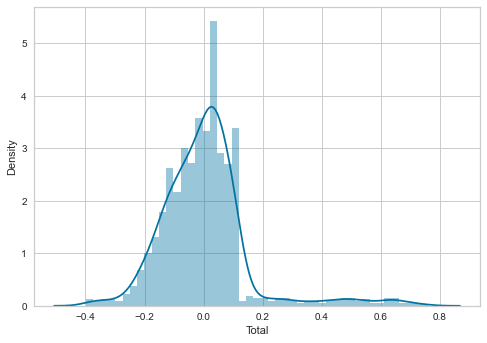

In [38]:
#plotting distribution of residuals:
x_residuals=v_test-v_pred;
ax = sns.distplot(x_residuals)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


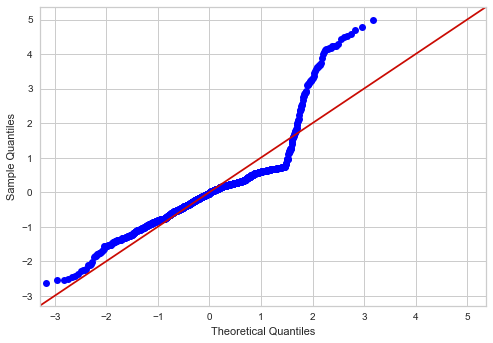

In [39]:
import statsmodels.api as sm
sm.qqplot(x_residuals,norm,fit=True,line="45")
plt.show()

Analysis : Residuals do not fit perfectly at some abnormally high target variable values that is, some states recorded a high suicide count.The removal of outliers can result in a better match of predicted vs actual , but it was not done to prevent the loss of information.

# Analysing Relationship 

As the dummy encoding lost the information on the levels that existed in "Type_Code = Educational Status" and "Type_Code = Economic Status" , the below section shows modelling with the two features (one at a time) to get a better understanding on how these factors affect the suicide count.

-> dataframe to be modelled individually : edustatus_df 





In [40]:
#Note: the Type column is already mapped ordinally, to represent the various education levels.
#Dropping the State/UT column,Mapping the Gender column, Scaling the Total column.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
edustatus_df[['Total']] = mms.fit_transform(edustatus_df[['Total']])
new_df =edustatus_df[(edustatus_df["Total"] > (edustatus_df["Total"].mean() + 3*edustatus_df["Total"].std())) | (edustatus_df["Total"] < (edustatus_df["Total"].mean() - 3*edustatus_df["Total"].std()))]

upper_limit = edustatus_df["Total"].mean() + 3*edustatus_df["Total"].std()
lower_limit = edustatus_df["Total"].mean() - 3*edustatus_df["Total"].std()

edustatus_df["Total"] = np.where(
    edustatus_df["Total"]>upper_limit,
    upper_limit,
    np.where(
       edustatus_df["Total"]<lower_limit,
        lower_limit,
        edustatus_df["Total"]
    )
)
edustatus_df=edustatus_df.replace({'Gender':'Male'},0)
edustatus_df=edustatus_df.replace({'Gender':'Female'},1)
edustatus_df=edustatus_df.drop(edustatus_df.index[edustatus_df["Gender"]=="Trans"])
edustatus_df=edustatus_df.drop(columns=["State/UT"])
edustatus_df


,Type,Gender,Total
1836,1,0,0.275126
1837,1,0,0.000688
1838,1,0,0.077559
1839,1,0,0.011244
1840,1,0,0.123451
...,...,...,...
5395,0,1,0.000000
5396,0,1,0.000000
5397,0,1,0.022487
5398,0,1,0.000000


<Figure size 1152x360 with 0 Axes>

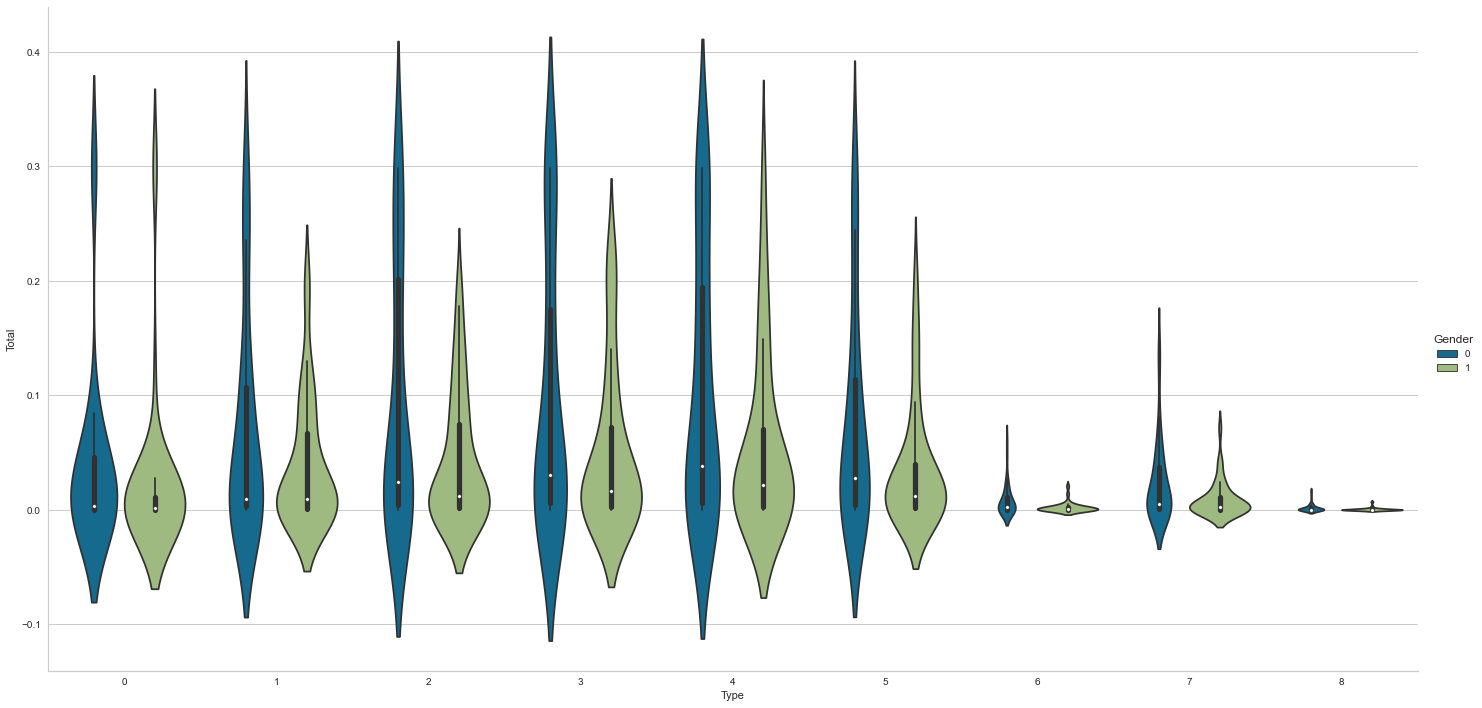

In [41]:
#Plotting Scatterplot
fig = plt.figure(figsize=(16,5)) 
sns.catplot(x="Type", y="Total", hue="Gender",data=edustatus_df, kind="violin",height =10, aspect=2)
plt.show()

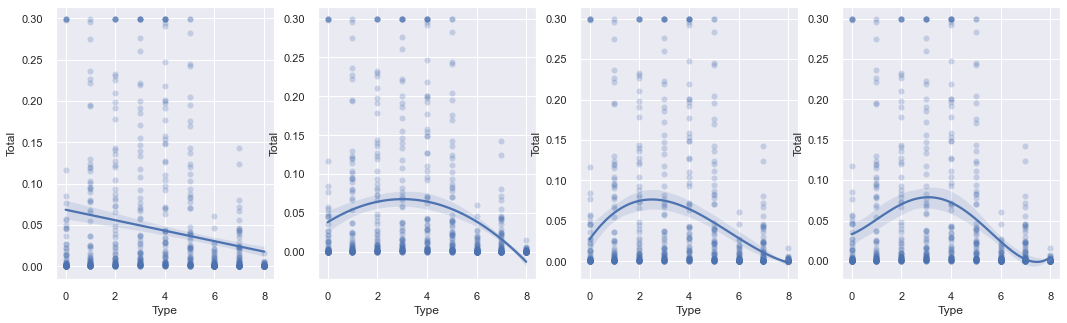

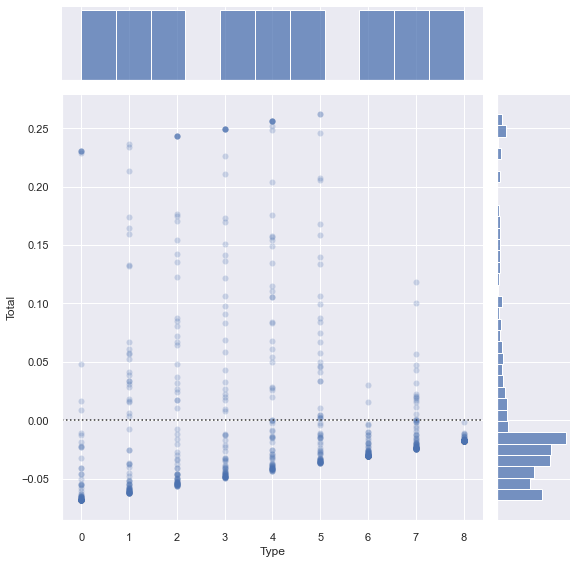

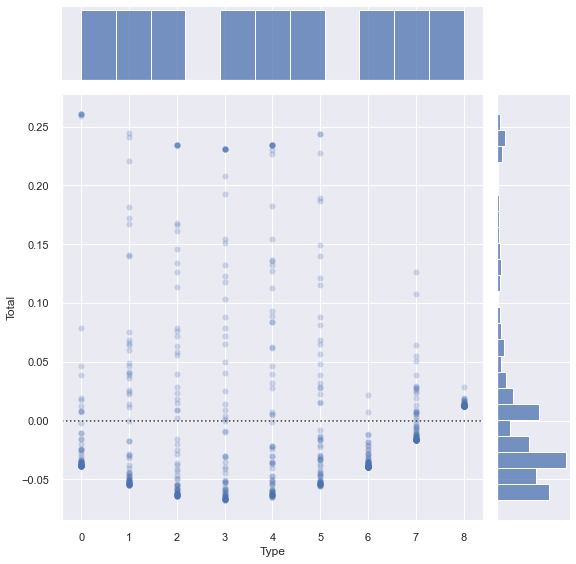

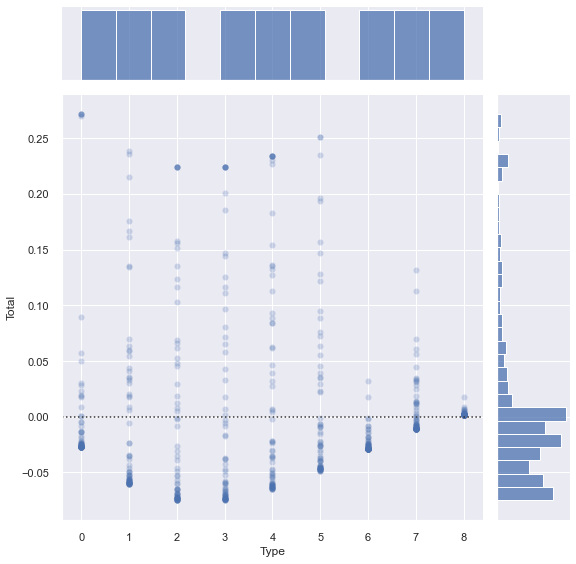

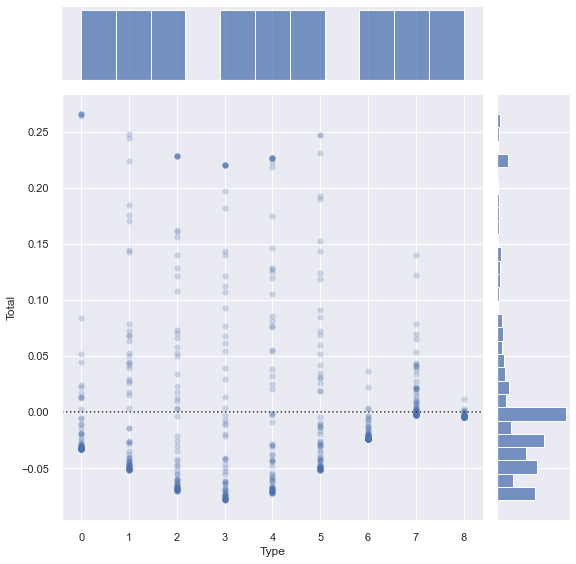

In [42]:
x1_all=edustatus_df.drop(["Total"],axis=1)
x1=edustatus_df.Type
y1=edustatus_df.Total
#checking for non-linear relationships
sns.set(color_codes=True)
#Trying different polynomial orders to fit the residuals
fig,axes = plt.subplots(1,4,figsize=(18,5))
sns.regplot(x=x1, y=y1, data=edustatus_df, scatter_kws={'alpha':0.25},ax = axes[0]);
sns.regplot(x=x1, y=y1, data=edustatus_df, order=2, scatter_kws={'alpha':0.25}, ax = axes[1]);
sns.regplot(x=x1, y=y1, data=edustatus_df, order=3, scatter_kws={'alpha':0.25}, ax = axes[2]);
sns.regplot(x=x1, y=y1, data=edustatus_df, order=4, scatter_kws={'alpha':0.25}, ax = axes[3]);
plt.show()
sns.jointplot(x=x1, y=y1, data=edustatus_df, kind="resid", scatter_kws={'alpha':0.25}, height=8);
plt.show()

sns.jointplot(x=x1, y=y1, data=edustatus_df, order=2, kind="resid", scatter_kws={'alpha':0.25}, height=8);
plt.show()

sns.jointplot(x=x1, y=y1, data=edustatus_df, order=3, kind="resid", scatter_kws={'alpha':0.25}, height=8);
plt.show()

sns.jointplot(x=x1, y=y1, data=edustatus_df, order=4, kind="resid", scatter_kws={'alpha':0.25}, height=8);
plt.show()

Polynomial of order=1 and order=2 have the best fit. Orders 3 and 4 are overfitting.

R2 Score: 0.10154788038365736
MSE : 0.005457948681350631
RMSE: 0.07387793094930739


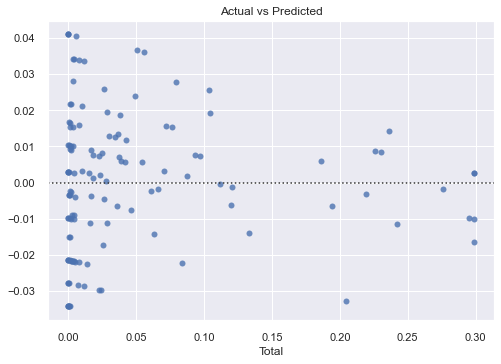

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


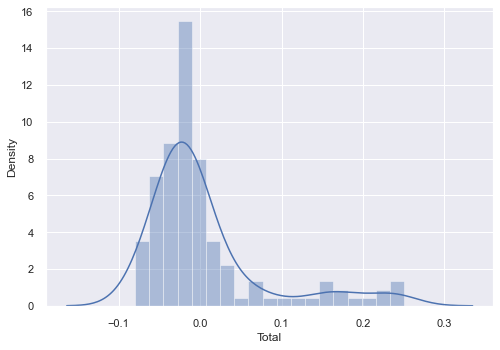

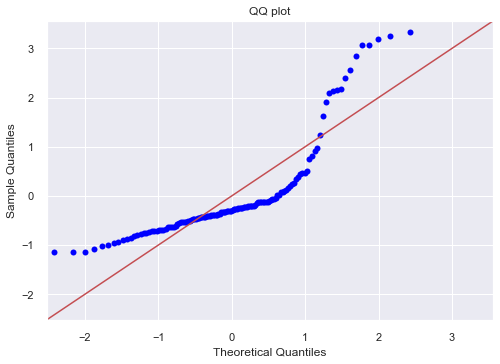

In [43]:

#Splitting into train test split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1_all,y1,test_size=0.2)
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR1 = LinearRegression()
# fitting the training data
LR1.fit(x1_train,y1_train)
y1_pred =  LR1.predict(x1_test)
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score1=r2_score(y1_test,y1_pred)
print("R2 Score:",score1)
print("MSE :",mean_squared_error(y1_test,y1_pred))
print("RMSE:",np.sqrt(mean_squared_error(y1_test,y1_pred)))
#plotting actual vs predicted:
sns.residplot(x=y1_test,y=y1_pred)
plt.title("Actual vs Predicted")
plt.show()
#plotting distribution of residuals:
x1_residuals=y1_test-y1_pred;
ax = sns.distplot(x1_residuals)
sm.qqplot(x1_residuals,norm,fit=True,line="45")
plt.title("QQ plot")
plt.show()

-> dataframe to be modelled individually : ecostatus_df 

In [44]:
ecostatus_df=ecostatus_df.replace({'Type':'less than 1 lakh'},1)
ecostatus_df=ecostatus_df.replace({'Type':'more than 1 lakh and less than 5 lakhs'},2)
ecostatus_df=ecostatus_df.replace({'Type':'more than 5 lakh and less than 10 lakhs'},3)
ecostatus_df=ecostatus_df.replace({'Type':'10 lakhs and above'},4)
mms = MinMaxScaler()
ecostatus_df[['Total']] = mms.fit_transform(ecostatus_df[['Total']])
new_df =ecostatus_df[(ecostatus_df["Total"] > (ecostatus_df["Total"].mean() + 3*ecostatus_df["Total"].std())) | (ecostatus_df["Total"] < (ecostatus_df["Total"].mean() - 3*ecostatus_df["Total"].std()))]

upper_limit = ecostatus_df["Total"].mean() + 3*ecostatus_df["Total"].std()
lower_limit = ecostatus_df["Total"].mean() - 3*ecostatus_df["Total"].std()

ecostatus_df["Total"] = np.where(
    ecostatus_df["Total"]>upper_limit,
    upper_limit,
    np.where(
       ecostatus_df["Total"]<lower_limit,
        lower_limit,
        ecostatus_df["Total"]
    )
)
ecostatus_df=ecostatus_df.replace({'Gender':'Male'},0)
ecostatus_df=ecostatus_df.replace({'Gender':'Female'},1)
ecostatus_df=ecostatus_df.drop(ecostatus_df.index[ecostatus_df["Gender"]=="Trans"])
ecostatus_df=ecostatus_df.drop(columns=["State/UT"])

ecostatus_df

,Type,Gender,Total
1692,1,0,0.370710
1693,1,0,0.005481
1694,1,0,0.117612
1695,1,0,0.016683
1696,1,0,0.379318
...,...,...,...
5071,4,1,0.000000
5072,4,1,0.000000
5073,4,1,0.000119
5074,4,1,0.000000


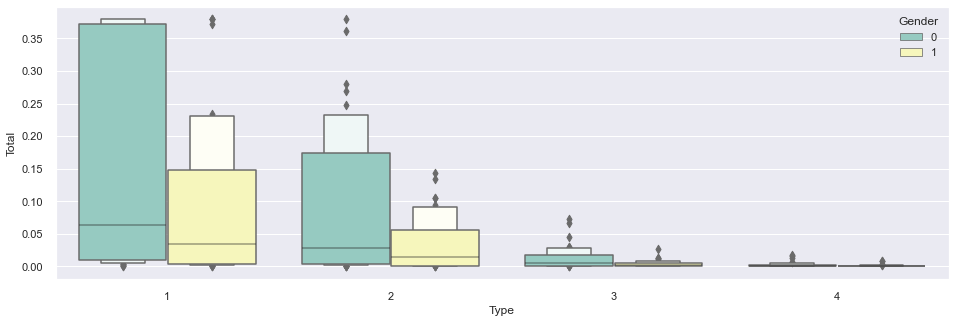

In [45]:
#Plotting Scatterplot
fig = plt.figure(figsize=(16,5))
sns.boxenplot(x="Type", y="Total", hue="Gender",data=ecostatus_df, palette="Set3")
plt.show()

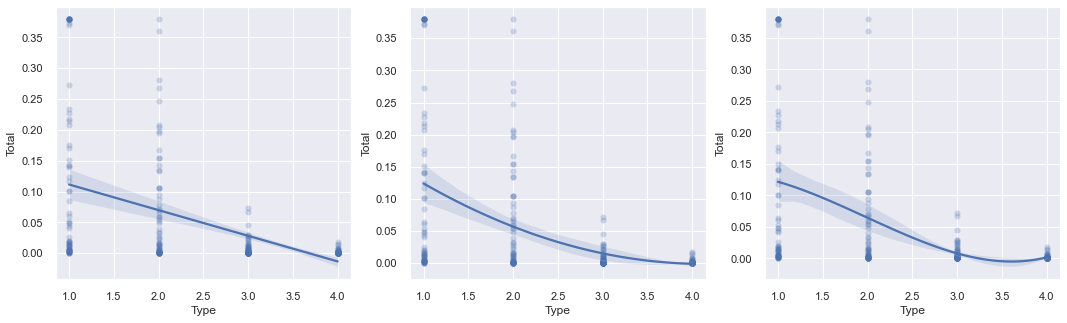

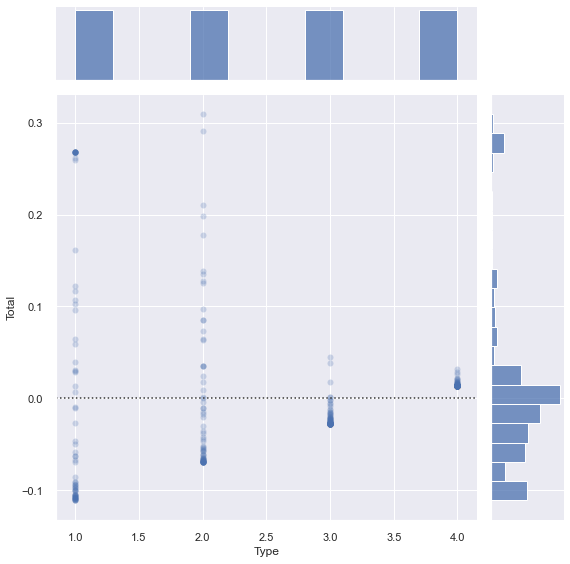

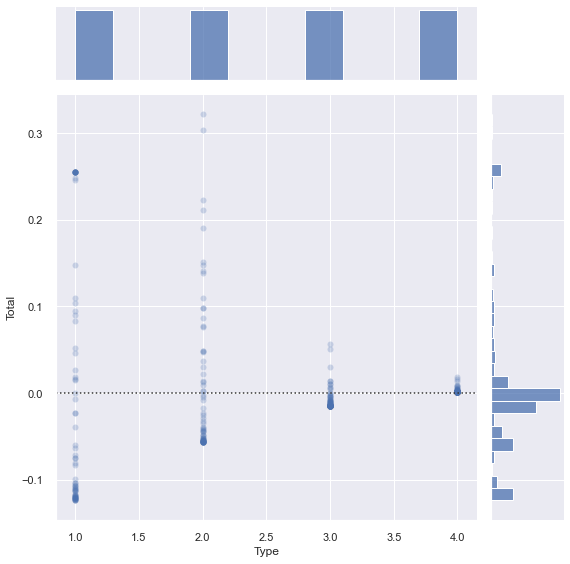

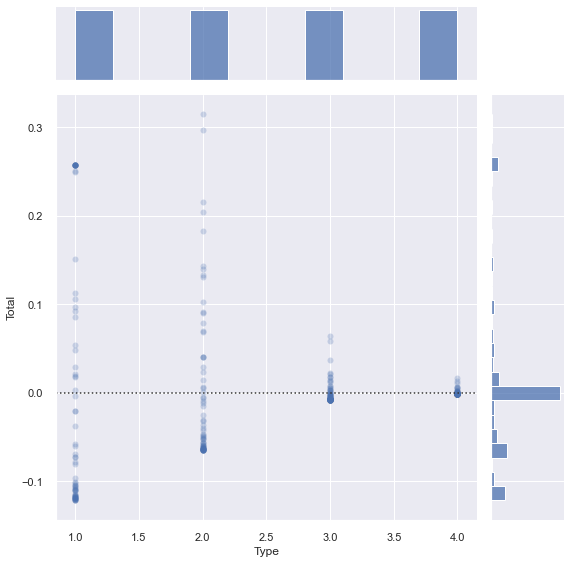

In [46]:
x2_all=ecostatus_df.drop(["Total"],axis=1)
x2=ecostatus_df.Type
y2=ecostatus_df.Total
sns.set(color_codes=True)
#Trying different polynomial orders to fit the residual plots
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.regplot(x=x2, y=y2, data=ecostatus_df, scatter_kws={'alpha':0.25},ax = axes[0]);
sns.regplot(x=x2, y=y2, data=ecostatus_df, order=2, scatter_kws={'alpha':0.25}, ax = axes[1]);
sns.regplot(x=x2, y=y2, data=ecostatus_df, order=3, scatter_kws={'alpha':0.25}, ax = axes[2]);
plt.show()
sns.jointplot(x=x2, y=y2, data=ecostatus_df, kind="resid", scatter_kws={'alpha':0.25}, height=8);
plt.show()

sns.jointplot(x=x2, y=y2, data=ecostatus_df, order=2, kind="resid", scatter_kws={'alpha':0.25}, height=8);
plt.show()

sns.jointplot(x=x2, y=y2, data=ecostatus_df, order=3, kind="resid", scatter_kws={'alpha':0.25}, height=8);
plt.show()



R2 Score: 0.2810900036174724
MSE : 0.006763005882600328
RMSE: 0.0822374968162354


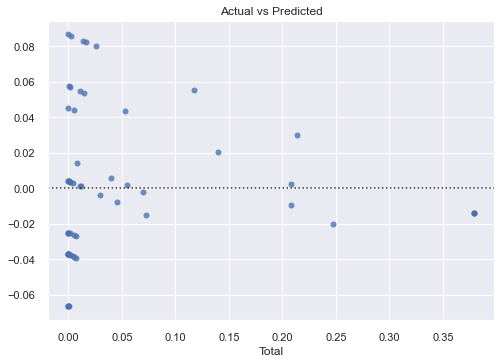

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


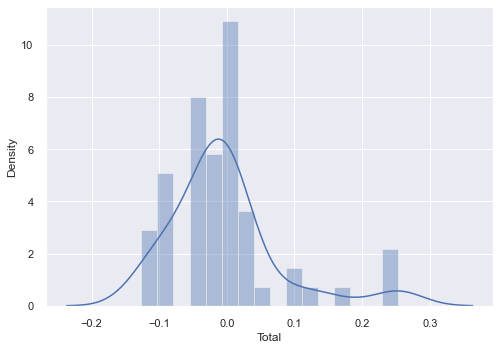

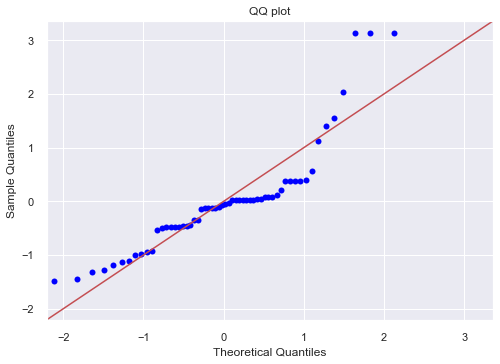

In [47]:

#Splitting the dataset
x2_train,x2_test,y2_train,y2_test=train_test_split(x2_all,y2,test_size=0.2)
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR2 = LinearRegression()
# fitting the training data
LR2.fit(x2_train,y2_train)
y2_pred =  LR2.predict(x2_test)
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score2=r2_score(y2_test,y2_pred)
print("R2 Score:",score2)
print("MSE :",mean_squared_error(y2_test,y2_pred))
print("RMSE:",np.sqrt(mean_squared_error(y2_test,y2_pred)))
#plotting actual vs predicted:
sns.residplot(x=y2_test,y=y2_pred)
plt.title("Actual vs Predicted")
plt.show()
#plotting distribution of residuals:
x2_residuals=y2_test-y2_pred;
ax = sns.distplot(x2_residuals)
sm.qqplot(x2_residuals,norm,fit=True,line="45")
plt.title("QQ plot")
plt.show()

# Code that did not make it to the analysis

# Dimensionality Reduction using PCA followed by Kmeans 
It did not significantly reduce the dimensions.Out of 134 it was reduced to 100 after PCA and 90 after applying kmeans on the reduced PCA dataset.

As the motive of this study is to understand the effect of social factors on the suicide counts, reducing dimensionality would generate results that are difficult to interpret.Hence this section was dropped.

In [49]:
#Importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Creating a copy of the dataset
suicidedf_copy=suicidedf.drop(["Category","State/UT","Type Code","Type"],axis=1)

#Data Preprocessing 
scaler=StandardScaler()
suicidedf_reduced=scaler.fit_transform(suicidedf_copy)


In [50]:
#PCA
pca=PCA()
pca.fit(suicidedf_reduced)
pca.explained_variance_ratio_.shape

(133,)

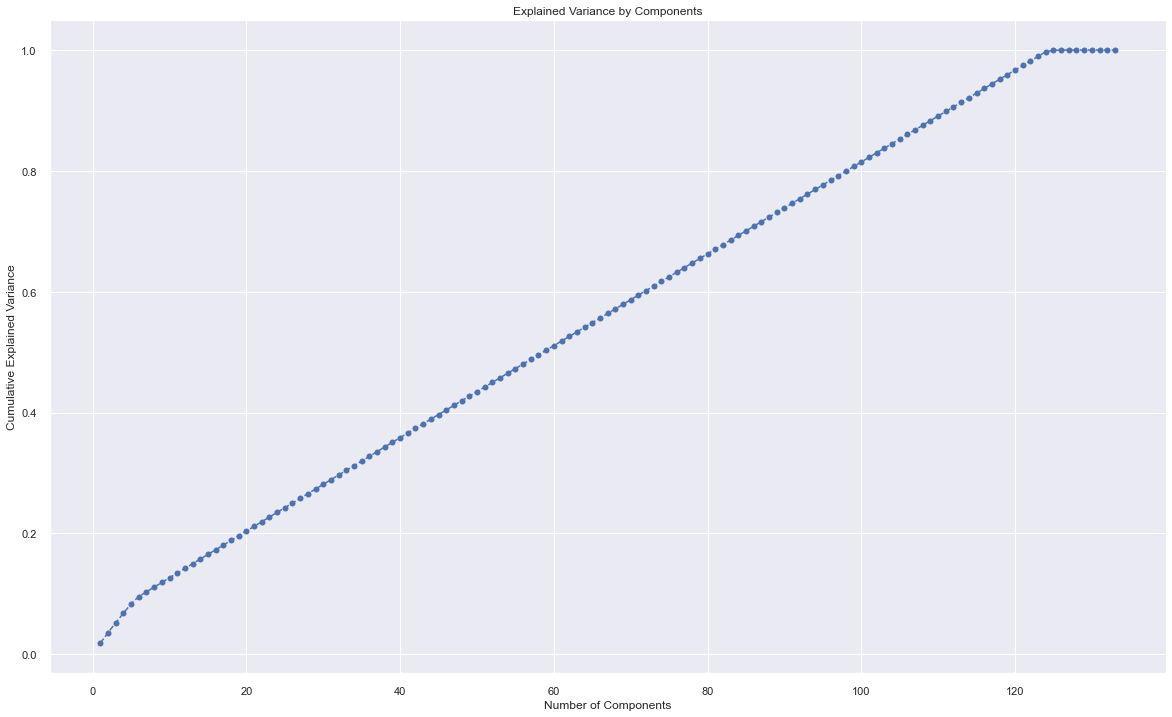

In [52]:
#How much of the explained variance 
plt.figure(figsize=(20,12))
plt.plot(range(1,134),pca.explained_variance_ratio_.cumsum(),marker="o",linestyle="--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [53]:
#This graph shows around 100 components are needed to explain about 80% of the dataset
pca=PCA(n_components=100)
pca.fit(suicidedf_reduced)
scores_pca=pca.transform(suicidedf_reduced)

In [54]:
#We fit kmeans using the transformed data from PCA
wcss=[]
for i in range(1,201):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

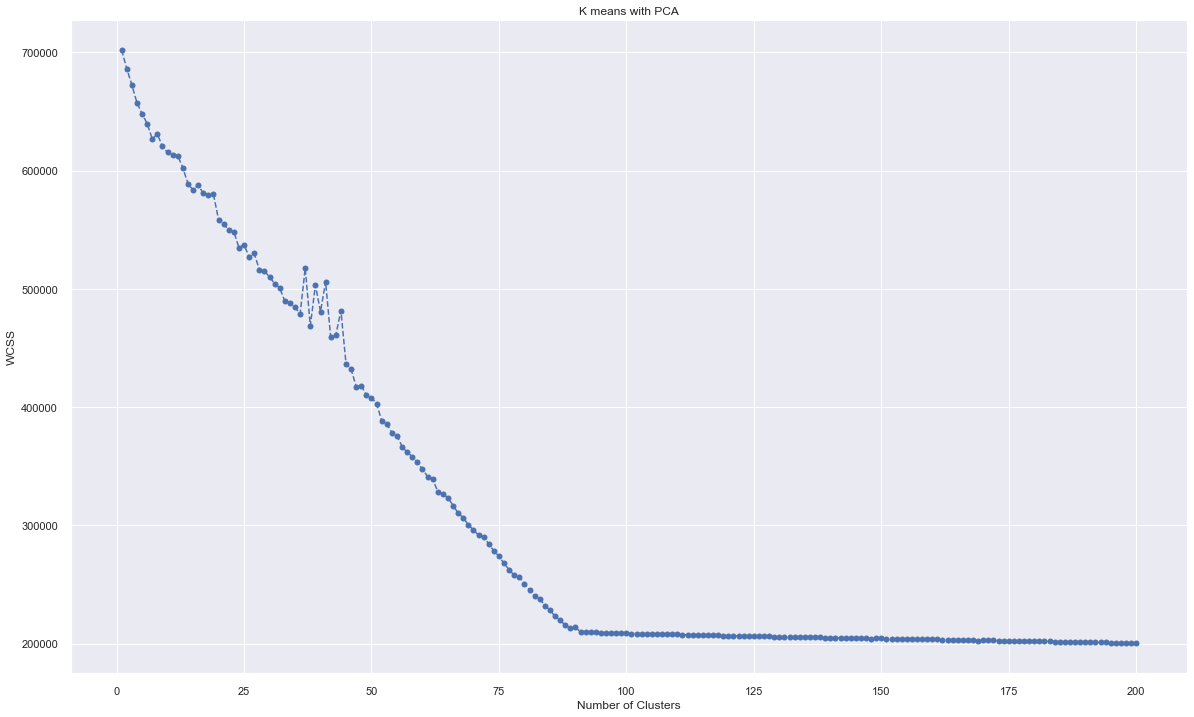

In [55]:
#Visualising the number of clusters 
plt.figure(figsize=(20,12))
plt.plot(range(1,201),wcss,marker="o",linestyle="--")
plt.title("K means with PCA")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [56]:
#Elbow at 90
kmeans_pca=KMeans(n_clusters=87,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=87, random_state=42)

In [57]:
suicidedf_pca_kmeans=pd.concat([suicidedf_copy.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
suicidedf_pca_kmeans["Kmeans Cluster"]=kmeans_pca.labels_

In [58]:
suicidedf_pca_kmeans

,Gender,Total,State/UT_A & NISLANDS,State/UT_ANDHRA PRADESH,State/UT_ARUNACHAL PRADESH,State/UT_ASSAM,State/UT_BIHAR,State/UT_CHANDIGARH,State/UT_CHHATTISGARH,State/UT_D & N HAVELI,...,91,92,93,94,95,96,97,98,99,Kmeans Cluster
0,0,0.013718,0,1,0,0,0,0,0,0,...,0.156090,-1.751096,-0.721458,-0.410508,0.995326,-0.181576,1.022941,-1.007918,-0.042812,28
1,0,0.000000,0,0,1,0,0,0,0,0,...,0.156090,-1.751096,-0.721458,-0.410508,0.995326,-0.181576,1.022941,-1.007918,-0.042812,28
2,0,0.004332,0,0,0,1,0,0,0,0,...,0.156090,-1.751096,-0.721458,-0.410508,0.995326,-0.181576,1.022941,-1.007918,-0.042812,28
3,0,0.021659,0,0,0,0,1,0,0,0,...,0.156090,-1.751096,-0.721458,-0.410508,0.995326,-0.181576,1.022941,-1.007918,-0.042812,28
4,0,0.005054,0,0,0,0,0,0,1,0,...,0.156090,-1.751096,-0.721458,-0.410508,0.995326,-0.181576,1.022941,-1.007918,-0.042812,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,1,0.000000,0,0,0,0,0,0,0,1,...,-0.322033,-1.099779,1.217221,0.638682,0.087845,1.865277,-1.158774,-1.943675,-1.024302,6
6476,1,0.000000,0,0,0,0,0,0,0,0,...,-0.322033,-1.099779,1.217221,0.638682,0.087845,1.865277,-1.158774,-1.943675,-1.024302,6
6477,1,0.118404,0,0,0,0,0,0,0,0,...,-0.322033,-1.099779,1.217221,0.638682,0.087845,1.865277,-1.158774,-1.943675,-1.024302,6
6478,1,0.000000,0,0,0,0,0,0,0,0,...,-0.322033,-1.099779,1.217221,0.638682,0.087845,1.865277,-1.158774,-1.943675,-1.024302,6


Interpreting the results of the model to explain the relationship between the social factors and suicide count is difficult.